<a href="https://colab.research.google.com/github/felipeapellegrini/data_science_portfolio/blob/master/PROJETO_Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeirob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

**Instruções para o Projeto**

* Você deve importar o pandas e importar a base de dados da Polícia Militar do Rio de Janeiro sobre a violência
  * O arquivo `csv` se encontra no endereço abaixo:
    * https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv
  * Este arquivo `csv` foi pré-processado minimamente por mim, para focar nos pontos aprendidos neste Módulo
  * Este é o site oficial, do Governo do Estado do Rio de Janeiro:
    * http://www.ispdados.rj.gov.br/estatistica.html
  * Um *dashboard* interativo e visual pode ser encontrado no site abaixo:
    * http://www.ispvisualizacao.rj.gov.br/index.html
  * Você está livre para apagar, alterar e acrescentar o que quiser!
  * Se você sentiu dificuldade, não se preocupe! Disponibilizei a minha própria solução para servir de guia, porém tente fazer a sua por você mesmo inicialmente.
    * Se sentir perdido é normal, mas acredite: O seu cérebro vai começar a adquirir uma capacidade nova de pensar em hipóteses e questionar dados.
  
  
---
  

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Cristo_Redentor_-_Rio_de_Janeiro%2C_Brasil.jpg/800px-Cristo_Redentor_-_Rio_de_Janeiro%2C_Brasil.jpg" height="160px"></center>

# Analisando a Violência no Rio de Janeiro

O Estado do Rio de Janeiro é conhecido por sua beleza natural, pela música e cultura. Já foi cenário de novela e filmes (nacionais e internacionais), e tem como um de seus cartões postais a [Sétima Maravilha do Mundo Moderno](https://pt.wikipedia.org/wiki/Cristo_Redentor).

Porém quando se fala desse Estado, nem tudo são flores. Um assunto que está sempre em pauta na sua gestão é a **violência**.

Atualmente, as leis de acesso à informação e a conscientização dos órgãos públicos, vêm proporcionando a disponibilização de várias fontes de dados.

Como exemplo, o governo do Rio de Janeiro traz a iniciativa do [portal ISPDados](http://www.ispdados.rj.gov.br/). Neste projeto, faremos uma análise em cima dos indicadores estatísticos da violência no Rio, explorando algumas das variáveis fornecidas.


## Obtenção dos Dados

Os dados para este estudo foram obtidos através do portal ISPDados, que é uma página de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro.

As estatísticas divulgadas no portal são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias de Polícia Civil do Rio de Janeiro, além de informações complementares de órgãos específicos da PMERJ.

Como forma de criar um controle de qualidade, antes de serem consolidados no ISP, os RO são submetidos à Corregedoria Interna da Polícia Civil (COINPOL). As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.

No caso do conjunto de dados utilizado aqui, o arquivo `csv` pode ser baixado diretamente [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv).

### Importando os dados

In [0]:
# importando pandas
import pandas as pd

# importando dataset violência no RJ
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv')

## Análise Inicial dos Dados

Nas próximas seções deste projeto vamos explorar os dados, procurando explicar a estruturação dos dados deste conjunto.

A seguir verificaremos:

* Quantas variáveis e entradas possui o conjunto;
* Como estão nomeadas as variáveis (colunas);
* Quais os tipos de dados de cada variável;
* Visualização rápida das 5 primeiras entradas do conjunto;
* Verificação da porcentagem de dados faltantes no conjunto, por variável.

----


### Quantidade de variáveis e entradas do conjunto de dados

In [4]:
# verificando o tamanho do conjunto de dados
print('Variáveis: \t {}'.format(df.shape[0]))
print('Entradas: \t {}'.format(df.shape[1]))

Variáveis: 	 344
Entradas: 	 56


### Nomes das variáveis (colunas)

In [6]:
# nomes das colunas
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

### Tipos de dados das variáveis

In [8]:
# tipos das colunas
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

### Cabeçalho do conjunto de dados

In [16]:
# primeiras 5 entradas do conjunto
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


### Porcentagem e visualização de dados faltantes no conjunto

Verificamos que existe uma grande quantidade de dados faltantes no conjunto, podendo prejudicar uma eventual análise.

----

In [17]:
# percentual de valores faltantes por variável
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

### Verificando porcentagem de variáveis com dados faltantes

Observamos abaixo que mais de 50% das variáveis possuem dados faltantes. 

Isso torna o nosso conjunto um pouco ineficiente.

----

In [55]:
(df.isnull().sum() > 0).value_counts()/df.shape[1]

True     0.535714
False    0.464286
dtype: float64

### Visualizando dados faltantes com mapa de calor

Na figura abaixo visualizamos um mapa com todos os dados preenchidos em roxo e os dados faltantes em amarelo.

Minha sensação aqui é que existe uma grande parte do conjunto faltando, portanto vamos explorar maneiras de tratar esses dados.

------

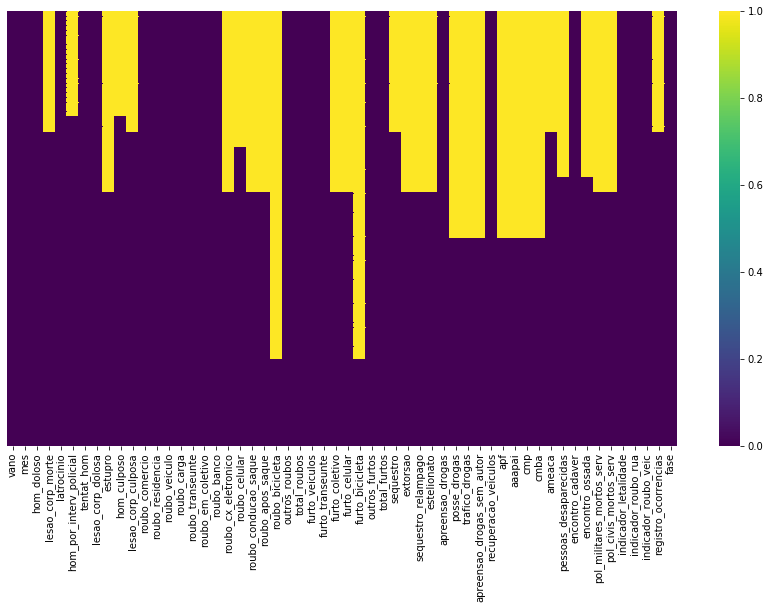

In [23]:
# importando pacotes para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# visualizando dados faltantes
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis');

## Informações Estatísticas da Violência no Rio de Janeiro

Abaixo segue um resumo estatístico deste conjunto de dados, onde podemos observar a média e o desvio padrão das variáveis, bem como a taxa de sucesso de recuperação de veículos roubados ou furtados.

----------

### Resumo estatístico dos dados

In [56]:
# verificando o resumo estatístico dos dados
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

In [57]:
# percentual de sucesso em recuperação de veículos roubados/furtados
df.recuperacao_veiculos.sum()/(df.roubo_veiculo.sum() + df.furto_veiculos.sum())

0.42980346705075084

## Visualização de Dados

Vamos explorar nosso dataset a partir de gráficos, buscando encontrar algum padrão nestes dados.


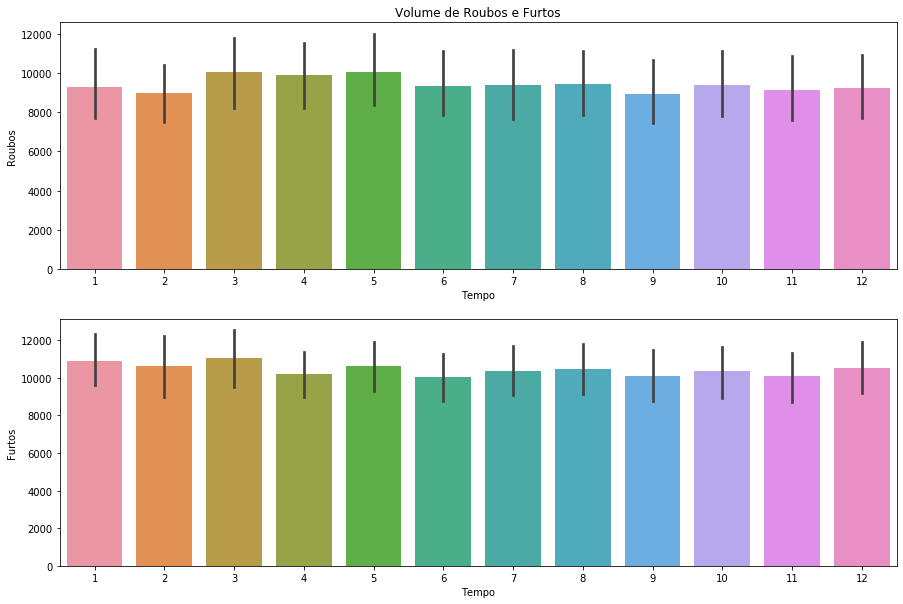

In [132]:
# volume de roubos e furtos por tempo
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.title('Volume de Roubos e Furtos')
sns.barplot(df.mes, df.total_roubos)
plt.xlabel('Tempo')
plt.ylabel('Roubos')
plt.subplot(2,1,2)
sns.barplot(df.mes, df.total_furtos)
plt.xlabel('Tempo')
plt.ylabel('Furtos');

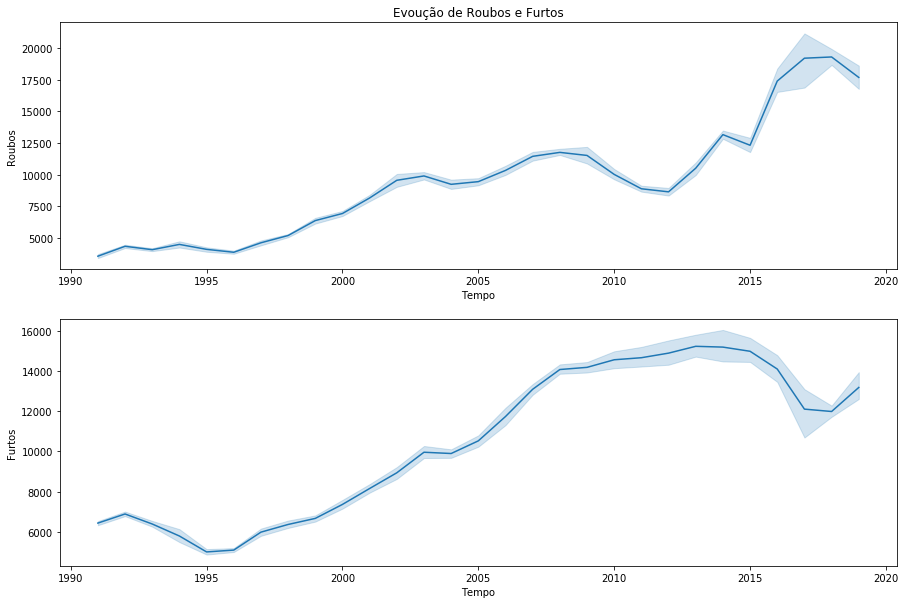

In [130]:
# evolução de roubos e furtos por tempo
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.title('Evoução de Roubos e Furtos')
sns.lineplot(df.vano, df.total_roubos)
plt.xlabel('Tempo')
plt.ylabel('Roubos')
plt.subplot(2,1,2)
sns.lineplot(df.vano, df.total_furtos)
plt.xlabel('Tempo')
plt.ylabel('Furtos');

In [90]:
# declarando estação do ano aproximada
df['estacao_ano'] = df.mes.apply(lambda x: 'Verao' if x <= 3
                                 else 'Outono' if x <= 6
                                 else 'Inverno' if x <= 9 else 'Primavera')
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase,estacao_ano
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3,Verao
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3,Verao
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3,Verao
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3,Outono
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3,Outono


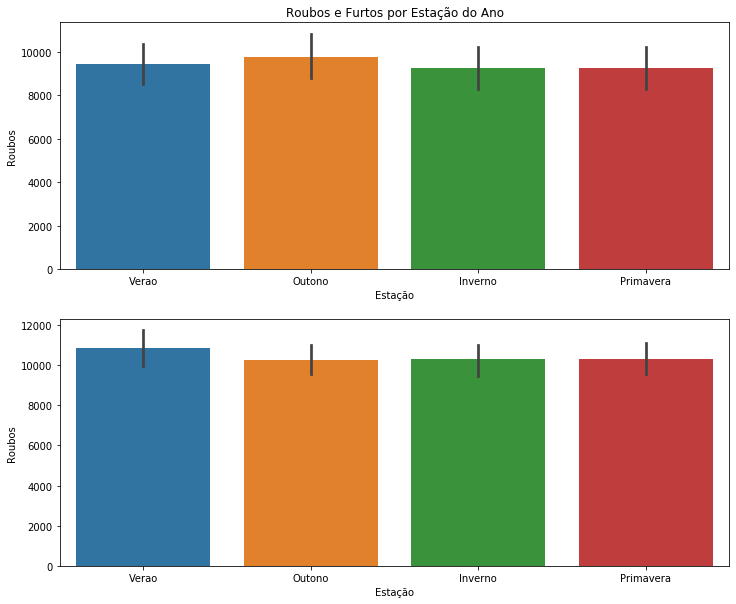

In [133]:
# verificando distribuição de roubos e furtos por estação do ano
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.title('Roubos e Furtos por Estação do Ano')
sns.barplot(df.estacao_ano, df.total_roubos)
plt.ylabel('Roubos')
plt.xlabel('Estação')
plt.subplot(2,1,2)
sns.barplot(df.estacao_ano, df.total_furtos)
plt.ylabel('Roubos')
plt.xlabel('Estação');

## Falando de Crimes contra a Mulher

O que infelizmente ainda é uma prática recorrente em nossa sociedade, o crime contra a mulher ainda tem seus dados muito vazios.

Muito provavelmente isso acontece pela falta do registro de ocorrências, que pode ser influenciada pelo medo. Infelizmente o dataset não nos permite avaliar e interpretar sobre isso.

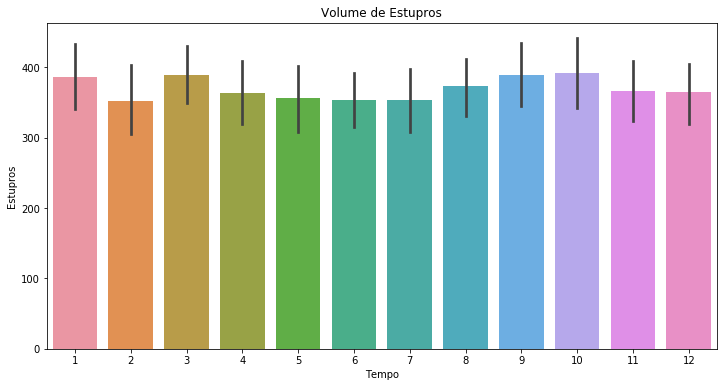

In [136]:
# volume de estupros por tempo
plt.figure(figsize=(12,6))
plt.title('Volume de Estupros')
sns.barplot(df.mes, df.estupro)
plt.xlabel('Tempo')
plt.ylabel('Estupros');

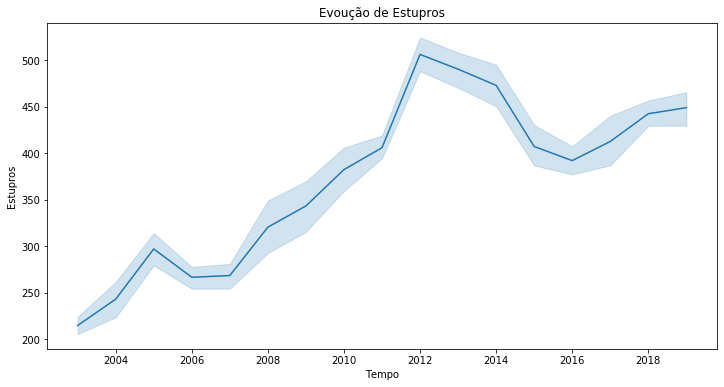

In [138]:
# evolução de estupros por tempo
plt.figure(figsize=(12,6))
plt.title('Evoução de Estupros')
sns.lineplot(df.vano, df.estupro)
plt.xlabel('Tempo')
plt.ylabel('Estupros');

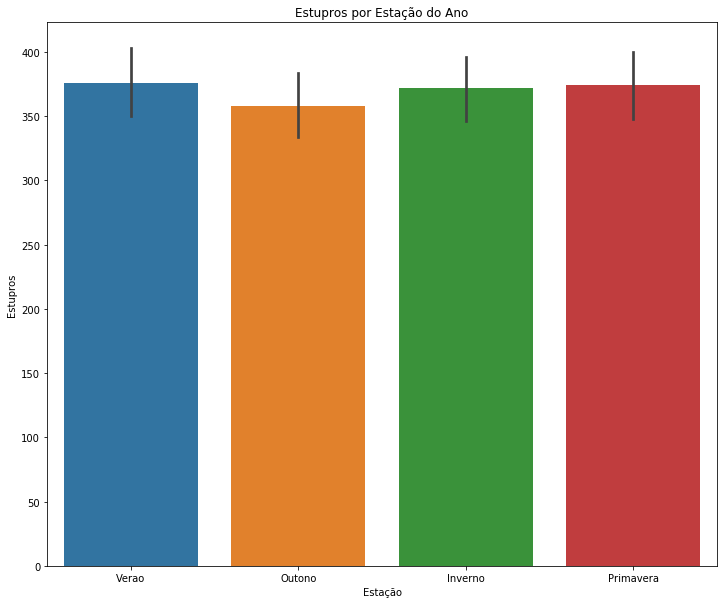

In [139]:
# verificando distribuição de estupros por estação do ano
plt.figure(figsize=(12,10))
plt.title('Estupros por Estação do Ano')
sns.barplot(df.estacao_ano, df.estupro)
plt.ylabel('Estupros')
plt.xlabel('Estação');

## Conclusão

Podemos verificar que nos últimos anos, o Estado tem conseguido controlar o volume de roubos, após um grande incremento neste indicador. O que está longe de ser o melhor cenário para o Rio, vem caminhando a pequenos passos para uma sociedade mais controlada.

Porém, infelizmente, o RJ não vem conseguindo fazer uma boa gestão quando falamos em furtos, que retomaram crescimento nos últimos 2 anos.

Falando em especial de crimes contra a mulher, o único registro claro que temos é o estupro (que ainda conta com 42% dos dados ausentes/faltantes).

É possível concluir que o estado do RJ vem deixando a desejar nas políticas de controle de estupros, que voltam a crescer assim como os furtos, porém tem uma relação de importância incomparável.

Apesar de termos mais furtos e estupros no verão, os números não são suficientes para afirmarmos que estes crimes são mais registrados de fato por ser ou não tal estação.

Assim, o que concluímos é que o trabalho de segurança pública do Rio de Janeiro, ainda que esteja se esforçando, precisa ser muito mais efetivo se quiser tirar o estado da condição de "extremamente violento".